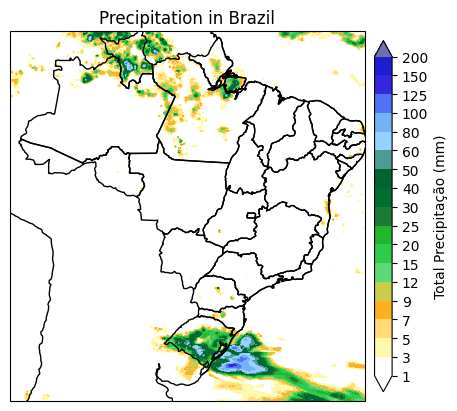

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
from matplotlib import colors

# Open the GRIB2 file
data = xr.open_dataset('./MERGE_CPTEC_20230922.grib2', engine='cfgrib')

# Extract the precipitation data
precipitation = data['prec']

# Create a map of Brazil
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()

# Set the extent to cover Brazil
ax.set_extent([-75, -35, -35, 5])  # [lon_min, lon_max, lat_min, lat_max]

# Plot precipitation data
# im = precipitation.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Blues')

# Add a colorbar and label
# cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.005)
# cbar.set_label('Precipitation (mm)')

# Draw state boundaries
states = NaturalEarthFeature(
        "cultural",
        "admin_1_states_provinces_lakes",
        "50m",
        edgecolor="black",
        facecolor="none",
    )
ax.add_feature(states)

schemes = {
    "colors": [
        "#FFFFFF", "#FFF9AE", "#FFDC78", "#FFAF20", "#C8CE4A",
        "#5DDA75", "#2FCB4D", "#23B52E", "#1A7A36", "#006E31",
        "#036331", "#4C9C95", "#96D2FD", "#72B3F1", "#5271F7",
        "#3327E0", "#1D1ED0", "#7070AD", "#4F4F4F",
    ],
    "bounds": [
        1, 3, 5, 7, 9,
        12, 15, 20, 25,
        30, 40, 50, 60, 80,
        100, 125, 150, 200,
    ]
}
COLOR_LIST = schemes.get("colors")
BOUNDS = schemes.get("bounds")
precipitation.plot.contourf(
        ax=ax,
        extend="both",
        cmap=colors.ListedColormap(COLOR_LIST),
        norm=colors.BoundaryNorm(
            boundaries=BOUNDS, ncolors=len(COLOR_LIST) - 2
        ),
        cbar_kwargs={
            "ticks": BOUNDS,
            "label": "Total Precipitação (mm)",
            "fraction": 0.05,
            "pad": 0.02,
            "shrink": 0.95,
        },
    )

# Add a title
plt.title('Precipitation in Brazil')

# Show the plot
plt.show()